In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Database loading and pre-processing
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

dataset_name =('/content/gdrive/MyDrive/Pattern Project/chronic_kidney_disease.csv')




In [ ]:
kidney_dataframe = pd.read_csv(dataset_name)

print('Shape of dataset: ' + str(kidney_dataframe.shape))
print('Total number of data = ' + str(kidney_dataframe.shape[0]))
print('Total number of attributes  = ' + str(kidney_dataframe.shape[1]))

Shape of dataset: (400, 25)
Total number of data = 400
Total number of attributes  = 25


In [ ]:
kidney_dataframe = kidney_dataframe.replace('?', np.nan)
    
#set the features and the target variables
target_class = kidney_dataframe['class']

feature_classes = kidney_dataframe.iloc[:, 0:24]
    
    
knn_missing_values_imputer = KNNImputer(n_neighbors=3)
feature_classes = pd.DataFrame(knn_missing_values_imputer.fit_transform(feature_classes),
                                   columns = feature_classes.columns)

    
    
#Scaling 
standard_scaler = StandardScaler()
feature_classes = standard_scaler.fit_transform(feature_classes)
feature_classes = pd.DataFrame(feature_classes, columns=['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 
                                                             'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 
                                                             'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 
                                                             'cad', 'appet', 'pe', 'ane']) 
#Encoding target class 
target_encoder = preprocessing.LabelEncoder()
target_class = target_encoder.fit_transform(target_class)
target_class1 = pd.DataFrame(target_class, columns=['class'])


    
#split the dataset
train_features, test_features, train_target, test_target = train_test_split(feature_classes, target_class, 
                                                                                train_size = 0.7, test_size = 0.3,random_state=0)
print('\nAfter Pre-processing:')
print('Size of train dataset: ' + str(train_target.shape[0]))
print('Size of test dataset: ' + str(test_target.shape[0]))


After Pre-processing:
Size of train dataset: 280
Size of test dataset: 120


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


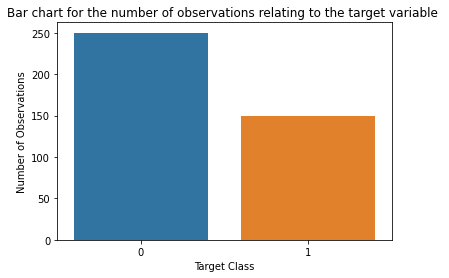

In [ ]:
#Target class Visualisation
sns.countplot(pd.concat([feature_classes, target_class1], axis=1, sort=False)['class'], label = "Count")
plt.title('Bar chart for the number of observations relating to the target variable ')
plt.xlabel('Target Class')
plt.ylabel('Number of Observations')
plt.show()

In [ ]:

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

#initialise svm
svm_model = SVC()

parameters_grid = {'kernel': ['poly', 'rbf', 'linear', 'sigmoid'], 
                   'C': [0.1, 1, 10, 100, 1000], 
                   'gamma': ['scale', 'auto'], 
                   'shrinking': [True, False]}

Best parameters :
 {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid', 'shrinking': True}

Precision: 0.9791666666666666
Accuracy: 0.9833333333333333
Recall: 0.9791666666666666
F1-score: 0.9791666666666666

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        48

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120


Confusion Matrix: 
[[71  1]
 [ 1 47]]


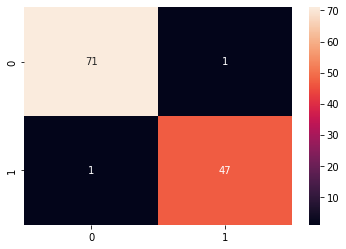

In [ ]:
svm_grid_search = GridSearchCV(svm_model, parameters_grid, scoring = 'accuracy')
svm_grid_search.fit(train_features, train_target)

print('Best parameters :\n ' +str(svm_grid_search.best_params_))


svm_prediction = svm_grid_search.predict(test_features)


print('\nPrecision: ' + str(metrics.precision_score(test_target, svm_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(test_target, svm_prediction)))
print('Recall: ' + str(metrics.recall_score(test_target, svm_prediction)))
print('F1-score: ' + str(metrics.f1_score(test_target, svm_prediction)))


print('\nClassification Report:\n' + str(metrics.classification_report(test_target, svm_prediction)))
print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(test_target, svm_prediction)))
sns.heatmap(metrics.confusion_matrix(test_target, svm_prediction), annot = True)
plt.show()

Best parameters :
 {'algorithm': 'auto', 'n_jobs': 1, 'n_neighbors': 2, 'weights': 'uniform'}

Best model after gridsearch:
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=2, p=2,
                     weights='uniform')

Precision: 0.9787234042553191
Accuracy: 0.975
Recall: 0.9583333333333334
F1-score: 0.968421052631579

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.96      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120


Confusion Matrix: 
[[71  1]
 [ 2 46]]


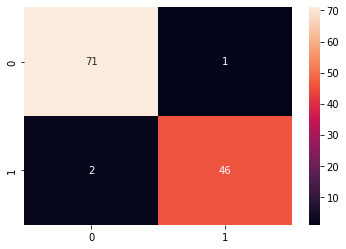

In [ ]:
#K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier


knn_model = KNeighborsClassifier()

knn_parameters_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                       'weights': ['uniform', 'distance'], 
                       'algorithm':['auto', 'ball_tree','kd_tree','brute'], 
                       'n_jobs':[1, -1]}


knn_grid_search = GridSearchCV(knn_model, knn_parameters_grid, scoring = 'accuracy')
#fit the data to the grid
knn_grid_search.fit(train_features, train_target)

print('Best parameters :\n ' +str(knn_grid_search.best_params_))

print('\nBest model after gridsearch:\n ' + str(knn_grid_search.best_estimator_))


knn_prediction = knn_grid_search.predict(test_features)


print('\nPrecision: ' + str(metrics.precision_score(test_target, knn_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(test_target, knn_prediction)))
print('Recall: ' + str(metrics.recall_score(test_target, knn_prediction)))
print('F1-score: ' + str(metrics.f1_score(test_target, knn_prediction)))


print('\nClassification Report:\n' + str(metrics.classification_report(test_target, knn_prediction)))


print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(test_target, knn_prediction)))

sns.heatmap(metrics.confusion_matrix(test_target, knn_prediction), annot = True)
plt.show()

The best parameters are:
 {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 5, 'splitter': 'best'}

The best model after gridsearch is:
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Precision: 0.9574468085106383
Accuracy: 0.9583333333333334
Recall: 0.9375
F1-score: 0.9473684210526315

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        72
           1       0.96      0.94      0.95        48

    accuracy                           0.96       120
   macro avg       0.96      0.95      0.96       120
weighted avg       0.

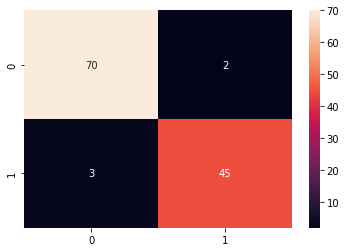

In [ ]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier


decision_tree_model = DecisionTreeClassifier(random_state = 0)


dt_parameters_grid = {'criterion': ['gini', 'entropy'], 
                      'splitter': ['best', 'random'], 
                      'min_samples_leaf': [1, 2, 3, 4, 5], 
                      'max_features': ['auto', 'sqrt', 'log2']}


dt_grid_search = GridSearchCV(decision_tree_model, dt_parameters_grid, scoring = 'accuracy')

dt_grid_search.fit(train_features, train_target)


print('The best parameters are:\n ' +str(dt_grid_search.best_params_))


print('\nThe best model after gridsearch is:\n ' + str(dt_grid_search.best_estimator_))


dt_prediction = dt_grid_search.predict(test_features)


print('\nPrecision: ' + str(metrics.precision_score(test_target, dt_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(test_target, dt_prediction)))
print('Recall: ' + str(metrics.recall_score(test_target, dt_prediction)))
print('F1-score: ' + str(metrics.f1_score(test_target, dt_prediction)))


print('\nClassification Report:\n' + str(metrics.classification_report(test_target, dt_prediction)))


print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(test_target, dt_prediction)))

sns.heatmap(metrics.confusion_matrix(test_target, dt_prediction), annot = True)
plt.show()